In [25]:
pip install transformers

In [26]:
pip install contractions

In [27]:
import pandas as pd
import preprocess

# Read the CSV file
input_Training_csv_file = 'training_with_emojis_emoticons.csv'
input_Testing_csv_file = 'validation_with_emojis_emoticons.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_Training_csv_file, sep=',',
                          names=["label", "comment"])

df2 = pd.read_csv(input_Testing_csv_file, sep=',',
                          names=["label", "comment"])

# Apply the transformation function to the first column
df['comment'] = df['comment'].apply(preprocess.preprocess_text)
df2['comment'] = df2['comment'].apply(preprocess.preprocess_text)

df.head()

,label,comment
0,positive,amazing game. definitely would recommend Emot...
1,positive,i usually avoid games like this. i have this g...
2,positive,absolutely phenomenal. an amazing game had it ...
3,positive,love the game really enjoyable and all the typ...
4,positive,it is a classic cozy game with a plethora of c...


In [28]:
df2.head()

,label,comment
0,positive,i always find myself redownloading this. it is...
1,positive,it is a very addictive tower defense game with...
2,positive,absolutely perfect to get your roks off! U+1F...
3,positive,this game is great Emoticon_Overjoyed i have...
4,positive,this game is very fun and addictive in a posit...


In [29]:
x_train=list(df['comment'])
y_train=list(df['label'])
x_test=list(df2['comment'])
y_test=list(df2['label'])
y_train

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

In [30]:
y_train=list(pd.get_dummies(y_train,drop_first=True)['positive'])
y_test=list(pd.get_dummies(y_test,drop_first=True)['positive'])

In [31]:
x_train

['amazing game. definitely would recommend  Emoticon_Happy   Emoticon_Happy  . game plays fun story in falling and just a nice game to play. however two things about it irk me that being about the pet and some minor gameplay issues i had. with the cat after waking up it gets in the way of the bed so i am unable to leave. with the gameplay issues i was in the mines and ate food to restore energy. froze my game lost progress. overall really good game highly recommend minor performance issues though. and the cat.  Emoticon_Kitty   Emoticon_Kitty ',
 'i usually avoid games like this. i have this game on switch and on pc. i was concerned about how hard it would be to use without a controller and just use touch screen. the controls are very intuitive if you touch a point your character will move there. it automatically uses the proper tool when touching an object to destroy. it is actually playable!  Emoticon_Laughing ',
 'absolutely phenomenal. an amazing game had it installed for years. if

In [32]:
x_test

['i always find myself redownloading this. it is the perfect blend of ingame progression and pay to win strategies. i never feel stuck if i do not spend money which happens in a lot of free games and the ads are completely optional but still often feel worth it. i am also a big fan of the upgrading genre  U+1F60A  Emoticon_Shocked ',
 'it is a very addictive tower defense game with many opportunities for gameplaycharacterselementsupgrades etcetera  Emoticon_Overjoyed  . it is very fun to grind in this game and it pays off a lot. i have no regret getting this game yet i do wish there was an ice element castle turret cannon. other than that i love this game and i am looking forward to the new updates!  U+1F44D',
 'absolutely perfect to get your roks off!  U+1F633 U+1F603 really good app. played a good few like this d . doing the usual quick free build 9 hrs later and still constant free options. okay i am cheap but am good at these specific apps and will stick with this one. prob worth t

In [33]:
from transformers import TFAutoModel, AutoModel, AutoTokenizer, DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [34]:
train_encodings = tokenizer(x_train, truncation=True, padding=True)
test_encodings = tokenizer(x_test, truncation=True, padding=True)

In [35]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [36]:
pip install datasets

In [37]:
pip install scikit-learn matplotlib

In [38]:
import numpy as np
from datasets import load_metric
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

def compute_metrics(eval_pred):
  load_accuracy = load_metric("accuracy")
  load_f1 = load_metric("f1")
  load_recall = load_metric("recall")

  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
  f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
  recall = load_recall.compute(predictions=predictions, references=labels)["recall"]

  precision = precision_score(y_true=labels, y_pred=predictions, average='weighted')
  metrics = ["Accuracy", "F1 Score", "Precision", "Recall"]
  values = [accuracy, f1, precision, recall]

  plt.bar(metrics, values)
  plt.xlabel("Metrics")
  plt.ylabel("Values")
  plt.title("Model Evaluation Metrics")
  plt.show()

  return {"accuracy": accuracy,"precision": precision, "f1": f1, "recall": recall}

In [39]:
pip install transformers[torch]

In [40]:
from transformers import TFDistilBertForSequenceClassification, TFTrainingArguments, TFTrainer

training_args = TFTrainingArguments(
   output_dir='./results',
   per_device_train_batch_size=8,
   per_device_eval_batch_size=8,
   num_train_epochs=3,
   weight_decay=0.01,
   learning_rate=1e-5,
   eval_steps=100
)

In [41]:
with training_args.strategy.scope():
  model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer (
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [42]:
trainer.train()

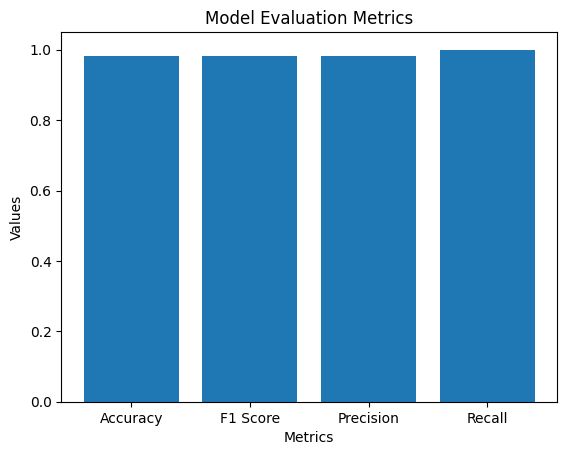

{'eval_loss': 0.05843221682768602,
 'eval_accuracy': 0.9807692307692307,
 'eval_precision': 0.9814685314685314,
 'eval_f1': 0.9814814814814815,
 'eval_recall': 1.0}

In [43]:
trainer.evaluate(test_dataset)

In [44]:
trainer.save_model('distilbert_trained_with_game_reviews')

In [45]:
from google.colab import files

In [46]:
files.download('/content/distilbert_trained_with_game_reviews/config.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
files.download('/content/distilbert_trained_with_game_reviews/tf_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>